## Health Care Spending and Life Expectancy in G7 Countries 1971-2014


**Region**:     G7 Countries (Canada, France, Germany, Great Britain, Italy, Japan, USA) 

**Category:**   Health Care

**Research Question**:   How did the amount of annual health care spending per capita and life expectancy in G7 countries change from 1971 to 2014?

<IPython.core.display.Javascript object>


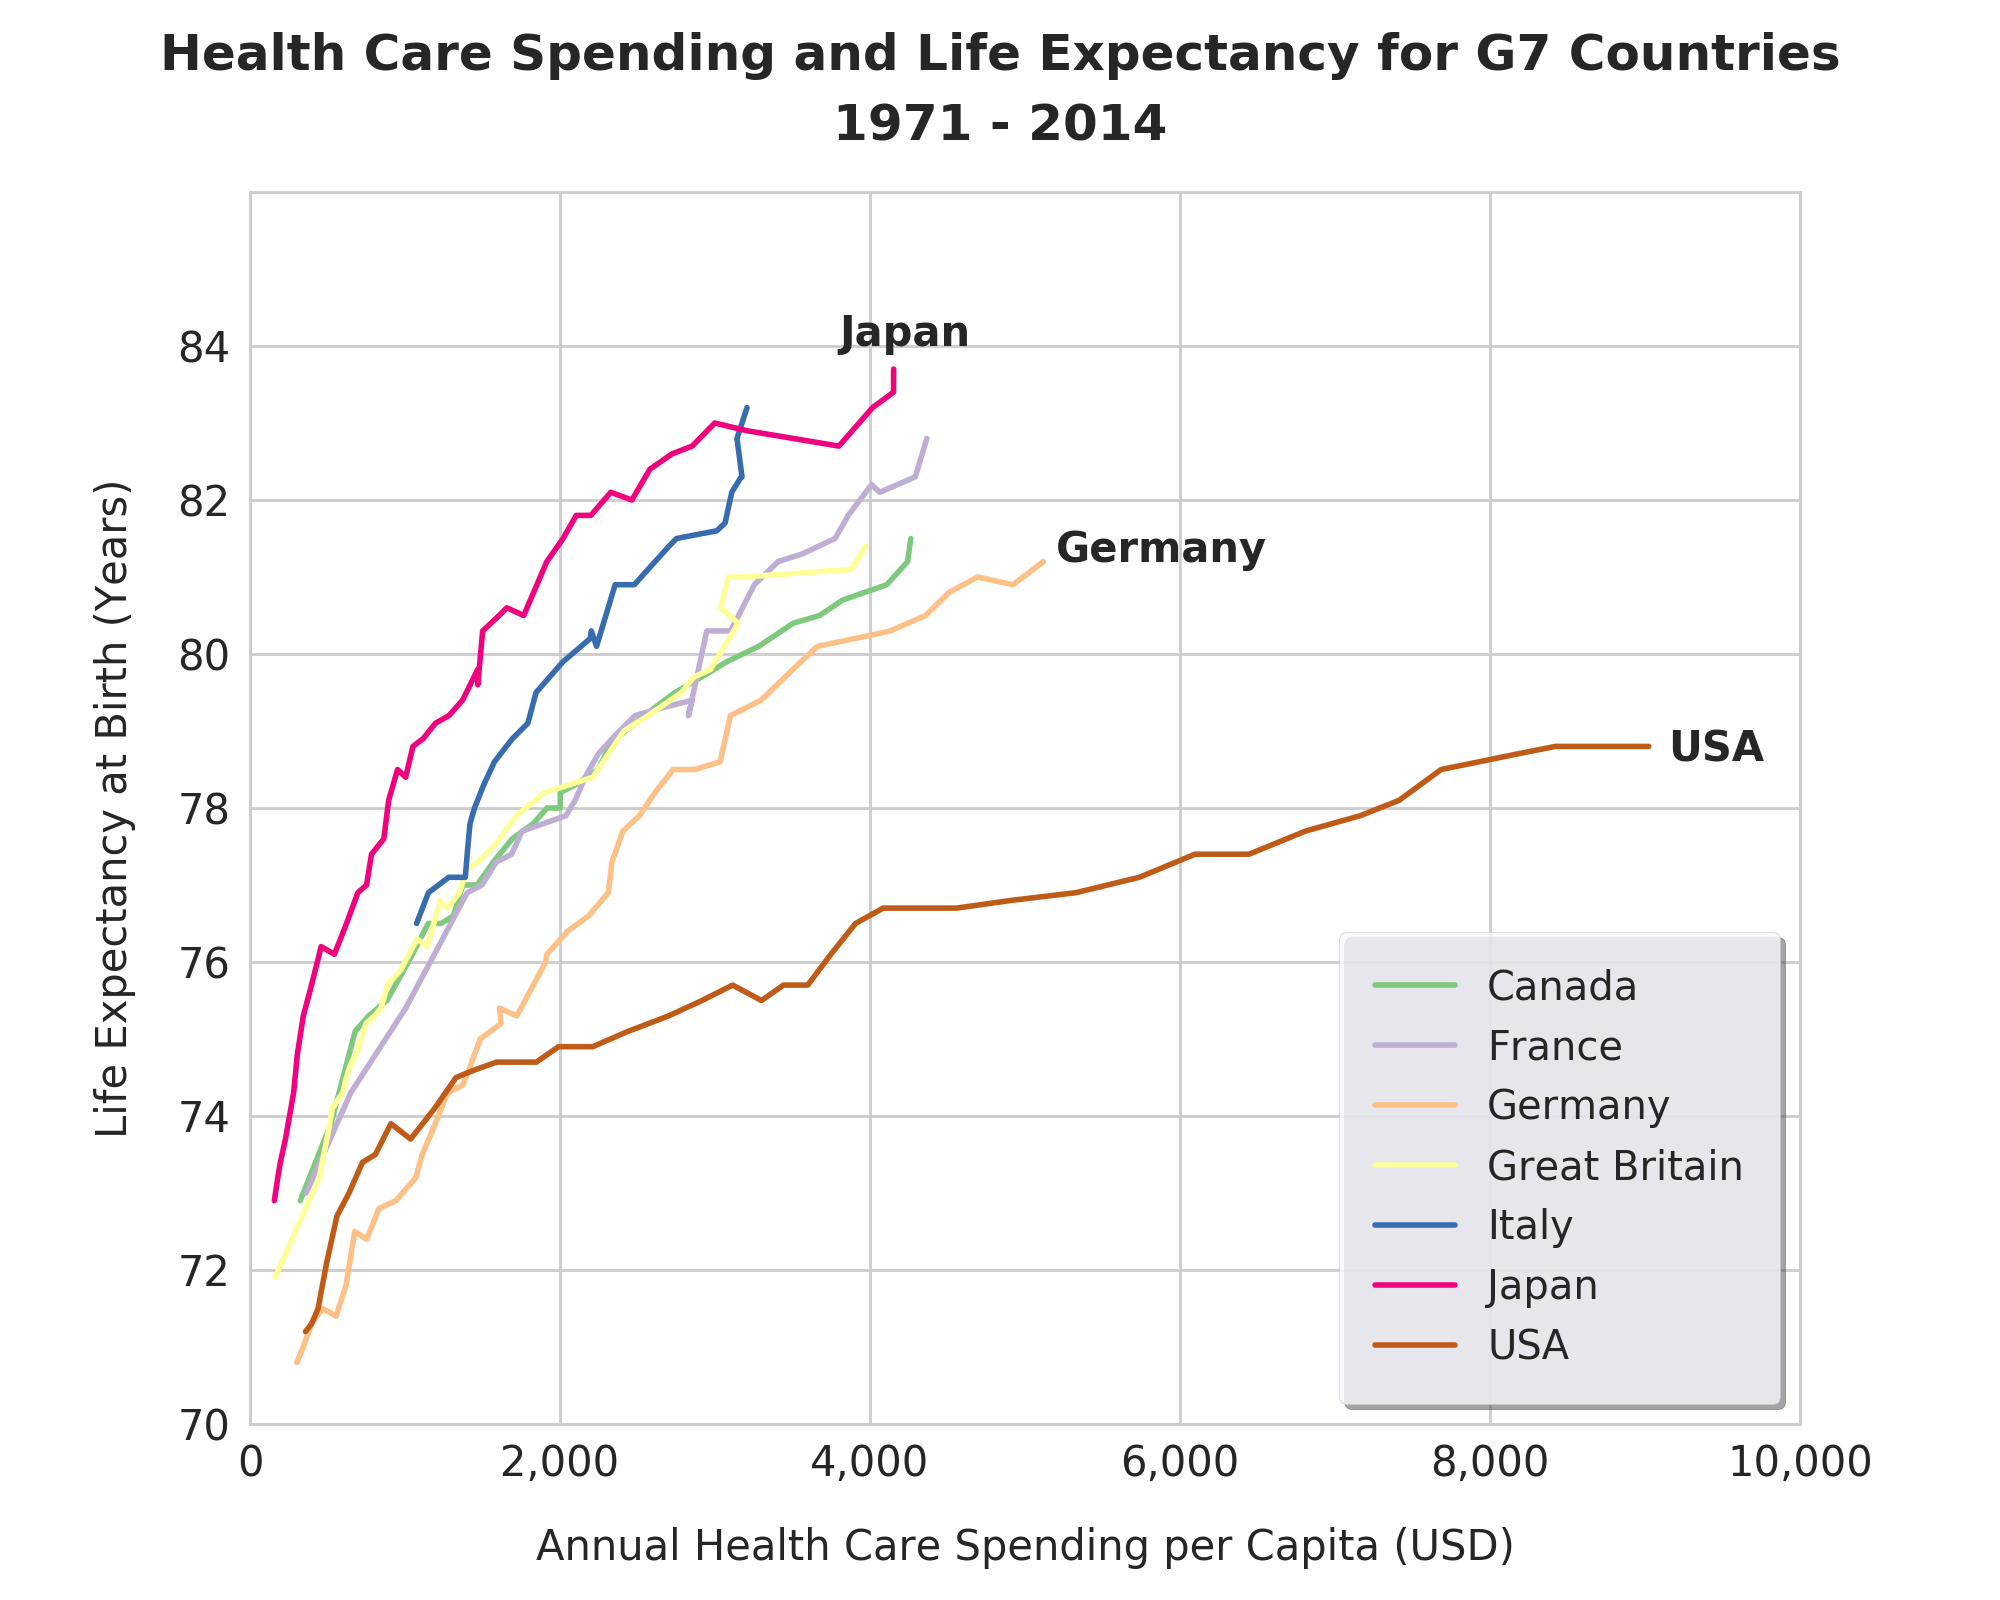

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_1 ='https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/health_spending_per_cap.csv'
df1 = pd.read_csv(url_1, header = 0)
df1 = df1[['LOCATION','TIME','Value']]

url_2 = 'https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/life_expect_birth.csv'
df2 = pd.read_csv(url_2, header = 0)
df2 = df2[['LOCATION','TIME','Value']]


G7_di = {'CAN':'Canada', 'FRA':'France', 'DEU':'Germany', 'ITA':'Italy', 'JPN':'Japan', 
         'GBR':'Great Britain', 'USA':'USA'}


df_spend = df1[(df1['TIME'] >= 1971) & (df1['LOCATION'].isin(G7_di))].reset_index(drop = True)
df_expect = df2[(df2['TIME'] >= 1971) & (df2['LOCATION'].isin(G7_di))].reset_index(drop = True)

df_spend_expect = pd.merge(df_spend, df_expect, on = ['LOCATION', 'TIME'], how = 'inner')
df_spend_expect.rename(columns={'LOCATION': 'Country', 'TIME': 'Year', 'Value_x': 'Health Spend per capita', 
                                'Value_y': 'Life Expectancy'}, inplace=True)
df_spend_expect.replace(G7_di, inplace=True)


plt.style.use('seaborn-whitegrid')
sns.set_palette('Accent', 7, 1)

fig, ax = plt.subplots()

for name, group in df_spend_expect.groupby('Country'):
    group.plot(x='Health Spend per capita', y='Life Expectancy', figsize = (10,8), fontsize = 15, 
               xlim = (0,10000), ylim = (70,86), lw=2, label=name, ax=ax)

ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_yticks(np.arange(70, 86, 2))

legend = ax.legend(loc=4, fontsize='large', borderpad = 0.9, frameon=True, shadow=True, framealpha=0.8)
legend.get_frame().set_facecolor('ghostwhite')

ax.annotate('Japan', xy=(4000,84), xytext=(3800, 84), fontsize=15, fontweight='bold')
ax.annotate('Germany', xy=(4300,83), xytext=(5200, 81.2), fontsize=15, fontweight='bold')
ax.annotate('USA', xy=(4000,84), xytext=(9150, 78.6), fontsize=15, fontweight='bold')

plt.xlabel('Annual Health Care Spending per Capita (USD)', size = 15, labelpad = 15)
plt.ylabel('Life Expectancy at Birth (Years)', size = 15, labelpad = 15)
fig.suptitle('Health Care Spending and Life Expectancy for G7 Countries\n' + '1971 - 2014',
             linespacing = 1.6, fontsize=18, fontweight='bold')

plt.show()

The visual illustrates the changes in the amount of annual health care spending per capita and life expectancy for the highly industrialized countries comprising G7, tracked over a period from 1971 to 2014. 
Data for G7 countries were extracted from two datasets, each containing 35 countries. For each G7 country, its yearly at-birth life expectancy (for males and females combined) was plotted against that year's health care spending per capita in US dollars.  

## Conclusions

The plot indicates that from 1971 to 2014 both annual health care spending and life expectancy were increasing in all G7 countries, with on average a positive correlation between the two variables. However, the growth rate of life expectancy lagged behind the growth rate of health care spending for countries spending the most, with the US as the most glaring example: the US significantly outspent its G7 peers, and yet achieved the lowest life expectancy. 

Germany, the country with the second-highest spending, is also behind all other G7 members in life expectancy, with the exception of the US. On the other end of the spectrum is Japan that achieved the highest life expectancy with only the fifth-highest spending. Clearly, throwing more money into health care does not guarantee improvements in the life span, and variables other than spending have a significant effect on life expectancy.